## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
<a id='probability'></a>
#### Part I - Probability

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.`
**a.**

In [4]:
AB = pd.read_csv("ab_data.csv",sep=',',na_values="NA")
AB.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.**

In [5]:
AB.shape

(294478, 5)

**c.**

In [6]:
AB.user_id.nunique()

290584

**d.**

In [7]:
AB['converted'].mean()

0.11965919355605512

**e.**

In [8]:
AB.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page == "new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

**f.**

In [9]:
AB.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.`
**a.**

In [10]:
df2 = AB.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.`**a.**

In [12]:
df2.user_id.nunique()

290584

In [13]:
df2.reset_index(drop=True)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


**b.**

In [14]:
df2['duplicated'] = df2.user_id.duplicated()
df2[df2['duplicated'] == True]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted,duplicated
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


**c.**

In [15]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted,duplicated
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


**d.**

In [16]:
df2 = df2.drop(2893).reset_index(drop=True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 6 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
duplicated      290584 non-null bool
dtypes: bool(1), int64(2), object(3)
memory usage: 11.4+ MB


`4.` 
**a.**

In [18]:
df2.converted.mean()

0.11959708724499628

**b.**

In [19]:
df3 = df2.query('group == "control"').groupby('converted').count()
df3['prop'] = df3.user_id / df3.user_id.sum()
print(df3.prop)

converted
0    0.879614
1    0.120386
Name: prop, dtype: float64


**c.**

In [20]:
df4 = df2.query('group == "treatment"').groupby('converted').count()
df4['prop'] = df4.user_id / df4.user_id.sum()
print(df4.prop)

converted
0    0.881192
1    0.118808
Name: prop, dtype: float64


**d.**

In [21]:
df2[df2['landing_page'] == "new_page"].shape[0] / df2.shape[0]

0.5000619442226688

**e.**

It does not appear that either page has an advantage in converting users. The probabilities for the entire sample compared to a user from the treatment or control pages are all nearly identical.

<a id='ab_test'></a>
### Part II - A/B Test
`1.`

**$H_{0}: p_{new} <= p_{old}$**

**$H_{1}: p_{new} > p_{old}$**

#2, **a.**

In [22]:
pnew = df2.converted.mean()
print(pnew)

0.119597087245


**b.**

In [23]:
pold = pnew
print(pold)

0.119597087245


**c.**

In [24]:
nnew = df2[df2['landing_page'] == 'new_page'].shape[0]

**d.**

In [25]:
nold = df2[df2['landing_page'] == 'old_page'].shape[0]

**e.**

In [26]:
new_page_converted = np.random.binomial(1,pnew,size=(nnew))
new_page_converted.mean()

0.11906957539054436

**f.**

In [27]:
old_page_converted = np.random.binomial(1,pold,size=(nold))
old_page_converted.mean()

0.11886504123242975

**g.**

In [28]:
pdiff = new_page_converted.mean() - old_page_converted.mean()
pdiff

0.00020453415811461095

**h.**

In [29]:
p_diffs = []
for _ in range(10000):
    opc = np.random.binomial(1,pold,size=(nold))
    npc = np.random.binomial(1,pnew,size=(nnew))
    diff = npc.mean() - opc.mean()
    p_diffs.append(diff)

**i.**

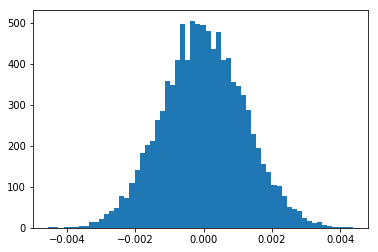

In [30]:
plt.hist(p_diffs, bins='auto');

**j.**

In [31]:
actual_diff = df4.prop[1] - df3.prop[1]

In [32]:
(p_diffs > actual_diff).mean()

0.90300000000000002

**k.**

The z score. It indicates the probability of failing to reject the original null hypothesis that the new page either had an equal or less impact on conversions vs rejecting the null for the alternative hypothesis that the new page had a greater impact on conversions. In this case, we fail to reject the null hypothesis due to the z-score being within the confidence interval of 95% (-1.96 to 1.96).  

**l.**

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

**m.**

In [34]:
z_score, p_val = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new])
print(z_score,p_val)

1.31092419842 0.189883374482


In [35]:
from scipy.stats import norm
norm.cdf(z_score)

0.90505831275902449

In [36]:
norm.ppf(1-(0.05/2))

1.959963984540054

**n.**
Assuming a 95% confidence interval, the z-score is under the critical value of 1.96, so we fail to reject the null hypothesis, which is equal to the p-vale of 0.189 > 0.05, also indicating we fail to reject the null hypothesis. This shows the new page likely had the same or less of an effect on the rate of customer conversions. The normalized z-score from part k is equal to the score I calculated in part k. 

<a id='regression'></a>
### Part III - A regression approach

**a.**
I should perform a linear regression to evaluate the conversion.

**b.**

In [45]:
df2['intercept'] = 1
df2[['ab_page','ctrl_pg']] = pd.get_dummies(df2['landing_page'])
df2.drop(['ctrl_pg'],axis=1,inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0


**c.**

In [49]:
lm = sm.OLS(df2['converted'],df2[['intercept','ab_page']])
sum1 = lm.fit()

**d.**

In [50]:
sum1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Sat, 12 Jan 2019   Prob (F-statistic):              0.190
Time:                        00:46:01   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The hypothesis for the regression analysis is as follows:

**$H_{0}: B_{0} = B_{1}$**

**$H_{1}: B_{0} ≠ B_{1}$**


The pvalue associated with ab_page is 0.19, indicating that its not statistically significant in predicting conversions and we reject the null hypothesis. This p-value relates to the significance of the landing page being used to predict the conversion whereas the value in Part II was used to determine if the new landing page has more or less of an effect on conversions than the old page.

**f.**
The r-squared value of 0 indicates that the model doesn't fit very well, which would tell me that I should swap in other variables to find one that is a better fit. Adding additional terms into the regression model could expose the model to multicollinearity, lack of linear relationships of the new variables to predicting the conversion rate, or other issues with doing multiple linear regressions.

**g.**

In [61]:
country = pd.read_csv('countries.csv',sep=',')
df2_c = pd.merge(df2,country,on='user_id')

In [66]:
dums = pd.get_dummies(df2_c['country'])
df2_c1 = df2_c.join(dums)
df2_c1.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US,0,0,1


In [75]:
lm2 = sm.OLS(df2_c1['converted'],df2_c1[['intercept','CA','UK']])
sums2 = lm2.fit()
sums2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Sat, 12 Jan 2019   Prob (F-statistic):              0.201
Time:                        02:52:05   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1195      0.001    166.244      0.000       0.118       0.121
CA            -0.0042      0.003     -1.516      0.130      -0.010       0.001
UK             0.0010      0.001      0.746      0.455      -0.002       0.004
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for Canada is negative, showing that it may be affected by multicollinearity and related to the other variables. 
Both the p-values for CA and UK are over 0.05, indicating neither are statistically significant for the model. Additionally, the R-squared value of 0 indicates the model is still a bad fit. US as the intercept may be the only worthwhile variable to use in predicting conversions, given the p-value of 0.

**h.**

In [76]:
lm3 = sm.OLS(df2_c1['converted'],df2_c1[['intercept','ab_page','CA','UK']])
sums3 = lm3.fit()
sums3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sat, 12 Jan 2019   Prob (F-statistic):              0.178
Time:                        03:18:29   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
CA            -0.0042      0.003     -1.514      0.130      -0.010       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The same results seem to appear in the comparison of the landing page the users see and their country of origin. The ab_page and CA are both negative, indicating they may be affected by multicollinearity and related to another variable. All the variables have very high p-values indicating they are not statistically significant for being used in the model. The R-squared value of this model is also 0. The pvalue of the intercept is 0, indicating that the users from the US and those shown the old page may have more chance to get users to purchase.  

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])